# Data Loading

In [ ]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

# Load data file

def load_local_csv(csv_path):
  return pd.read_csv(csv_path)

data = load_local_csv("healthcare-dataset-stroke-data.csv") # data from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# Data Discovery

In [ ]:
# View summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Get correlations

corr_matrix = data.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc95c2ab90>,
      dtype=object)

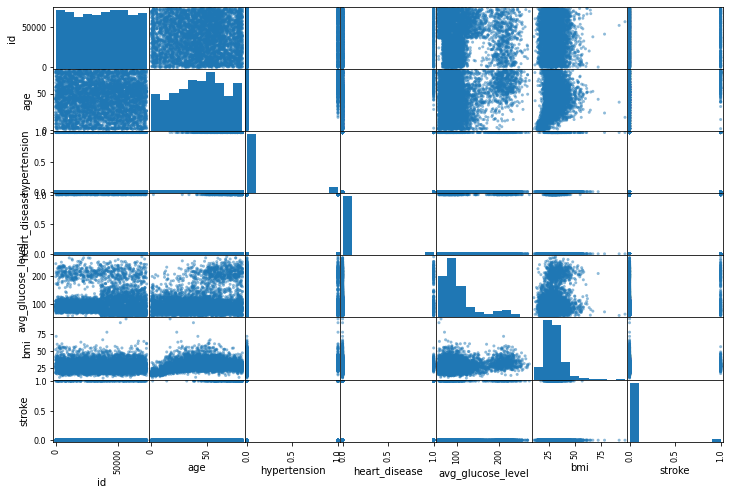

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12, 8))

# Preprocessing

In [ ]:
# drop incomplete data

data.dropna(inplace=True)
data = data[data['smoking_status'] != "Unknown"]
data = data[data["bmi"] != "N/A"]
data = data[data["gender"] != "Other"] # insufficient data in Other category for accurate predictions

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, ShuffleSplit

# drop irrelevant data
relevant_data = data.drop("id", axis=1)

# split data into train and test sets
train_set, test_set = train_test_split(relevant_data, test_size=0.2, random_state=42)
print(train_set.shape)

# stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in stratified_split.split(housing_data, housing_data[])

(2740, 11)


In [ ]:
# create labels and features
training_labels = train_set["stroke"].copy().to_numpy()
training_features = train_set.drop("stroke", axis=1)

testing_labels = test_set["stroke"].copy()
testing_features = test_set.drop("stroke", axis=1)

In [ ]:
# transform data using a pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_attribs = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
cat_attribs = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="median")),
     ('std_scaler', StandardScaler())
])

pipeline = ColumnTransformer([
      ('num', num_pipeline, num_attribs),
      ("cat", OneHotEncoder(), cat_attribs)
])

training_features_prepared = pipeline.fit_transform(training_features)
training_features_prepared_df = pd.DataFrame(data=training_features_prepared)
training_features_prepared_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.746462,-0.361058,-0.24654,-0.537871,-1.235804,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.997085,-0.361058,-0.24654,-0.950542,-0.311202,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.929884,-0.361058,-0.24654,3.022762,0.697455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.639408,-0.361058,-0.24654,-0.264870,-1.011658,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.515343,-0.361058,-0.24654,2.854989,0.977637,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.090464,-0.361058,-0.24654,-0.811506,0.809528,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,-0.408289,-0.361058,-0.24654,-0.516318,-0.241156,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.394615,-0.361058,-0.24654,-0.289381,-0.087056,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8,-1.371774,-0.361058,-0.24654,-0.433911,-0.955621,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,-1.425301,-0.361058,-0.24654,-0.462225,-1.319858,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Training

In [ ]:
# Define evaluation function

from sklearn.metrics import f1_score, balanced_accuracy_score, average_precision_score, precision_score, recall_score

def evaluate(model, features, labels):
  predictions = model.predict(features)

  mean_testing = np.mean(predictions == labels)
  print("Mean: " + str(mean_testing))
  recall_testing = recall_score(labels, predictions, average="binary", pos_label=1)
  print("Recall: " + str(recall_testing))
  precision_testing = precision_score(labels, predictions, average="binary", pos_label=1)
  print("Precision: " + str(precision_testing))
  f1_testing = f1_score(labels, predictions, average="binary", pos_label=1)
  print("F1 Score: " + str(f1_testing))

In [ ]:
# Train a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
logRes = LogisticRegression().fit(training_features_prepared, training_labels)

In [ ]:
evaluate(logRes, training_features_prepared, training_labels)

Mean: 0.9507299270072993
Recall: 0.007352941176470588
Precision: 1.0
F1 Score: 0.014598540145985401


In [ ]:
# Train a Support Vector Machine Classifier

from sklearn import svm

svc = svm.SVC(kernel="poly", random_state=42, probability=True)
svc.fit(training_features_prepared, training_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
evaluate(svc, training_features_prepared, training_labels)
svc.predict_proba(training_features_prepared)

Mean: 0.9536496350364964
Recall: 0.08088235294117647
Precision: 0.8461538461538461
F1 Score: 0.1476510067114094


array([[0.94765732, 0.05234268],
       [0.94575279, 0.05424721],
       [0.95100132, 0.04899868],
       ...,
       [0.95002549, 0.04997451],
       [0.94763636, 0.05236364],
       [0.95104982, 0.04895018]])

In [ ]:
# Train a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(training_features_prepared, training_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
evaluate(rfc, training_features_prepared, training_labels)
rfc.predict_proba(training_features_prepared)

Mean: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0


array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.95, 0.05]])

In [ ]:
# Train a Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(training_features_prepared, training_labels)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
evaluate(gbc, training_features_prepared, training_labels)
gbc.predict_proba(training_features_prepared)

Mean: 0.9635036496350365
Recall: 0.2647058823529412
Precision: 1.0
F1 Score: 0.4186046511627907


array([[0.99447904, 0.00552096],
       [0.99635826, 0.00364174],
       [0.95781438, 0.04218562],
       ...,
       [0.99695351, 0.00304649],
       [0.95427431, 0.04572569],
       [0.8941059 , 0.1058941 ]])

# Fine Tuning

In [ ]:
# SVC - Grid Search Cross Validation

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'degree': [2, 8, 18], "C": [0.5, 1, 5, 10, 20]},
    {'degree': [2, 8, 18], "C": [0.5, 1, 5, 10, 20]},
  ]

svc = svm.SVC(kernel="poly", random_state=42, probability=True)

svc_grid_search = GridSearchCV(svc, param_grid, cv=5,
                           scoring='recall',
                           return_train_score=True)

svc_grid_search.fit(training_features_prepared, training_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 1, 5, 10, 20], 'degree': [2, 8, 18]},
                         {'C': [0.5, 1, 5, 10, 20], 'degree': [2, 8, 18]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=0)

In [ ]:
# SVC - Grid Search Results

svc_cvres = svc_grid_search.cv_results_
print("Best params:", svc_grid_search.best_params_)

for mean_score, params in zip(svc_cvres["mean_test_score"], svc_cvres["params"]):
    print(mean_score, params)

Best params: {'C': 20, 'degree': 8}
0.0 {'C': 0.5, 'degree': 2}
0.08068783068783068 {'C': 0.5, 'degree': 8}
0.08068783068783068 {'C': 0.5, 'degree': 18}
0.0 {'C': 1, 'degree': 2}
0.07328042328042328 {'C': 1, 'degree': 8}
0.08068783068783068 {'C': 1, 'degree': 18}
0.0 {'C': 5, 'degree': 2}
0.09523809523809523 {'C': 5, 'degree': 8}
0.09523809523809523 {'C': 5, 'degree': 18}
0.0 {'C': 10, 'degree': 2}
0.10238095238095238 {'C': 10, 'degree': 8}
0.09523809523809523 {'C': 10, 'degree': 18}
0.014814814814814814 {'C': 20, 'degree': 2}
0.10952380952380951 {'C': 20, 'degree': 8}
0.08783068783068783 {'C': 20, 'degree': 18}
0.0 {'C': 0.5, 'degree': 2}
0.08068783068783068 {'C': 0.5, 'degree': 8}
0.08068783068783068 {'C': 0.5, 'degree': 18}
0.0 {'C': 1, 'degree': 2}
0.07328042328042328 {'C': 1, 'degree': 8}
0.08068783068783068 {'C': 1, 'degree': 18}
0.0 {'C': 5, 'degree': 2}
0.09523809523809523 {'C': 5, 'degree': 8}
0.09523809523809523 {'C': 5, 'degree': 18}
0.0 {'C': 10, 'degree': 2}
0.102380952380

In [ ]:
# RFC - Randomized Search Cross Validation

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=18),
    }

rfc = RandomForestClassifier()

rfc_rnd_search = RandomizedSearchCV(rfc, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=42)

rfc_rnd_search.fit(training_features_prepared, training_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# RFC - Randomized Search Results

rfc_cvres = rfc_rnd_search.cv_results_
print("Best params:", rfc_rnd_search.best_params_)

for mean_score, params in zip(rfc_cvres["mean_test_score"], rfc_cvres["params"]):
    print(mean_score, params)

Best params: {'max_features': 11, 'n_estimators': 88}
0.007142857142857143 {'max_features': 7, 'n_estimators': 180}
0.014285714285714285 {'max_features': 15, 'n_estimators': 107}
0.014285714285714285 {'max_features': 8, 'n_estimators': 189}
0.01455026455026455 {'max_features': 7, 'n_estimators': 122}
0.02169312169312169 {'max_features': 11, 'n_estimators': 88}
0.007142857142857143 {'max_features': 4, 'n_estimators': 104}
0.0 {'max_features': 3, 'n_estimators': 150}
0.01455026455026455 {'max_features': 2, 'n_estimators': 88}
0.02169312169312169 {'max_features': 12, 'n_estimators': 158}
0.007407407407407407 {'max_features': 6, 'n_estimators': 130}


In [32]:
# GBC - Grid Search Cross Validation

param_grid = [
    {'learning_rate': [0.1, 0.4, 0.7], "n_estimators": [50, 100, 300]},
    {'learning_rate': [0.1, 0.4, 0.7], "n_estimators": [50, 100, 300]},
  ]

gbc_2 = GradientBoostingClassifier()

gbc_grid_search = GridSearchCV(gbc_2, param_grid, cv=5,
                           scoring='recall',
                           return_train_score=True)

gbc_grid_search.fit(training_features_prepared, training_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [33]:
# RFC - Randomized Search Results

gbc_cvres = gbc_grid_search.cv_results_
print("Best params:", gbc_grid_search.best_params_)

for mean_score, params in zip(gbc_cvres["mean_test_score"], gbc_cvres["params"]):
    print(mean_score, params)

Best params: {'learning_rate': 0.7, 'n_estimators': 50}
0.0365079365079365 {'learning_rate': 0.1, 'n_estimators': 50}
0.0291005291005291 {'learning_rate': 0.1, 'n_estimators': 100}
0.06613756613756613 {'learning_rate': 0.1, 'n_estimators': 300}
0.06640211640211639 {'learning_rate': 0.4, 'n_estimators': 50}
0.05873015873015872 {'learning_rate': 0.4, 'n_estimators': 100}
0.05873015873015872 {'learning_rate': 0.4, 'n_estimators': 300}
0.09576719576719576 {'learning_rate': 0.7, 'n_estimators': 50}
0.09576719576719576 {'learning_rate': 0.7, 'n_estimators': 100}
0.09576719576719576 {'learning_rate': 0.7, 'n_estimators': 300}
0.0365079365079365 {'learning_rate': 0.1, 'n_estimators': 50}
0.0365079365079365 {'learning_rate': 0.1, 'n_estimators': 100}
0.06613756613756613 {'learning_rate': 0.1, 'n_estimators': 300}
0.08121693121693122 {'learning_rate': 0.4, 'n_estimators': 50}
0.06613756613756613 {'learning_rate': 0.4, 'n_estimators': 100}
0.06613756613756613 {'learning_rate': 0.4, 'n_estimators'

# Evaluation

In [34]:
model = gbc_grid_search.best_estimator_ #cvres.best_estimator_

In [35]:
# Transform testing_features

testing_features_prepared = pipeline.transform(testing_features)

In [36]:
evaluate(model, testing_features_prepared, testing_labels)

Mean: 0.9182481751824818
Recall: 0.06818181818181818
Precision: 0.16666666666666666
F1 Score: 0.0967741935483871


# Export

In [56]:
from sklearn.externals import joblib

import PandasCreatorModule

full_pipeline = Pipeline([
    ("pandas", PandasCreatorModule.PandasCreator()),
    ("transformation", pipeline),
    ("classification", model)
])

full_pipeline.fit(training_features, training_labels)

# print(full_pipeline.predict_proba(["Male", 67,0,1,"Yes", "Private","Urban",228.69, 36.6,"formerly smoked"]))

joblib.dump(full_pipeline, 'model.joblib')

['model.joblib']

In [57]:
!python setup.py sdist --formats=gztar

running sdist
running egg_info
writing PandasCreator.egg-info/PKG-INFO
writing dependency_links to PandasCreator.egg-info/dependency_links.txt
writing top-level names to PandasCreator.egg-info/top_level.txt
reading manifest file 'PandasCreator.egg-info/SOURCES.txt'
writing manifest file 'PandasCreator.egg-info/SOURCES.txt'

running check


creating PandasCreator-0.1
creating PandasCreator-0.1/PandasCreator.egg-info
copying files to PandasCreator-0.1...
copying PandasCreatorModule.py -> PandasCreator-0.1
copying setup.py -> PandasCreator-0.1
copying PandasCreator.egg-info/PKG-INFO -> PandasCreator-0.1/PandasCreator.egg-info
copying PandasCreator.egg-info/SOURCES.txt -> PandasCreator-0.1/PandasCreator.egg-info
copying PandasCreator.egg-info/dependency_links.txt -> PandasCreator-0.1/PandasCreator.egg-info
copying PandasCreator.egg-info/top_level.txt -> PandasCreator-0.1/PandasCreator.egg-info
Writing PandasCreator-0.1/setup.cfg
creating dist
Creating tar archive
removing 'PandasCreator-0.